**Description:**  
 Notebook for the analysis of scoring results for 50 READMEs created by Jamba 1.5 Mini. Keep in mind, the evaluation scores of the orignal README are the same like in df_score_lama because it make no sense the evaluate the same file twice. Commands to save figures and dataframes are comment out!  
**Dependencies**:  
 + preprocessing/05_counts.ipynb
 + data/df_repos_counts_filtered.json
 + data/df_score_jamba/  

*Hint: If lines are created with support of a Large Language Model or the code is taken from another source, you find following hint at the end of the line: (generated with Microsoft Copilot) or (source: link_to_source)*

In [ ]:
import pandas as pd # package for data manipulation
import json # package to work with JSON files
import matplotlib.pyplot as plt # package for plotting
from matplotlib.ticker import FormatStrFormatter # package for plotting
import numpy as np # package for numeric operations
from scipy.stats import mode # package to work with statistics
import seaborn as sns # package for plotting (works with matplotlib)

### Universal Functions

In [2]:
def exclude_repos(df):
    '''
    During the process there are some repositories found which can not be used because of inconsistence in the data. These repository data will be filterd out.  
        - diego-vicente: som-tsp --> GitHub repository has no README file
        - Taniiishk: Rock-Paper-Scissors-Game --> GitHub repository has no license
    '''
    repos_exclude = [('diego-vicente', 'som-tsp'), ('Taniiishk', 'Rock-Paper-Scissors-Game')]
    df = df[~df.set_index(['repo_owner', 'repo_name']).index.isin(repos_exclude)] 

    return df

In [ ]:
# function to removes columns which are not requiered for analysis of evaluation results
def remove_cols(df):
    df = df.drop([
        'readme_g_score', 
        'readme_g_score_q1_txt', 
        'readme_g_score_q2_txt', 
        'readme_g_score_q3_txt', 
        'readme_g_score_q4_txt', 
        'readme_g_score_q5_txt', 
        'readme_o_score', 
        'readme_o_score_q1',
        'readme_o_score_q1_txt', 
        'readme_o_score_q2',
        'readme_o_score_q2_txt', 
        'readme_o_score_q3',
        'readme_o_score_q3_txt',
        'readme_o_score_q4', 
        'readme_o_score_q4_txt', 
        'readme_o_score_q5',
        'readme_o_score_q5_txt'], axis=1)

    return df

In [ ]:
# function to load json file for specific path and save its content as dataframe
def load_data(path):
    with open(path, 'r') as f:
        loaded_data = json.load(f)

    df = pd.DataFrame(data=loaded_data)

    return df

In [ ]:
# function to sort df after the ids in df_order
def change_order(df, df_order):
    df = df.set_index('id').reindex(df_order['id']).reset_index()
    df = df[df.index < 50] # exclude all rows in df where the index > 49

    return df

In [ ]:
# function to create a new column id for df
def add_id_col(df):
    df['id'] = df['repo_owner'] + '_' + df['repo_name']

    return df

In [ ]:
# function to add the evaluation scores of the orignal READMEs to the df for each evaluation model
def add_o_score(df, model_type):
    df_o = load_data(path='../data/evaluation_results/df_llama.json') # json with scores for original README --> use this for further comparisions
    df_o = df_o[['id', 'repo_owner', 'model_type', 'repo_name', 'total_score_o', 'score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']]
    df_o = df_o[df_o['model_type'] == model_type]
    df = df.merge(df_o[['id', 'model_type', 'total_score_o', 'score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']], on='id', how='left')

    return df
    

# Dataframe df_jamba    
This dataframe gives an overview of the evaluation results from the original and genearted READMES (generated by jamba-1.5-mini). The scoring was created with three different kind of llms - llama3.1-8b, reka-flash & jamba-1.5-mini.

### Order of GitHub repositories

In [8]:
order_data = load_data(path='../data/df_repos_counts_filtered.json') # load json with filtered repository
df_order = pd.DataFrame(order_data) 

In [9]:
df_order = exclude_repos(df_order)
df_order = add_id_col(df_order)

In [10]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 200
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   repo_owner                    199 non-null    object
 1   repo_name                     199 non-null    object
 2   source_code_comments          199 non-null    int64 
 3   source_code                   199 non-null    int64 
 4   source_code_cleaned_comments  199 non-null    int64 
 5   source_code_cleaned           199 non-null    int64 
 6   comments                      199 non-null    int64 
 7   formatting                    199 non-null    int64 
 8   sum                           199 non-null    int64 
 9   id                            199 non-null    object
dtypes: int64(7), object(3)
memory usage: 17.1+ KB


## Model 1

In [11]:
model = 'model1'
path = f'../data/df_score_lama_mod/df_score_{model}_manuel.json'
df_1 = load_data(path)

In [12]:
len(df_1)

52

In [13]:
df_1 = exclude_repos(df_1)
df_1 = add_id_col(df_1)


In [14]:
len(df_1)

50

In [15]:
df_1 = change_order(df_1, df_order)
df_1 = remove_cols(df_1)
df_1 = add_o_score(df_1, model_type='llama3.1-8b')

In [16]:
len(df_1)

50

In [17]:
df_1.head(4)

,id,repo_owner,repo_name,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,model_type,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
0,openstack_openstack,openstack,openstack,5.0,4.0,5.0,2.0,2.0,llama3.1-8b,20,4,5,2,5,4
1,majumderb_rezero,majumderb,rezero,5.0,5.0,5.0,2.0,2.0,llama3.1-8b,21,5,5,4,2,5
2,andkret_Cookbook,andkret,Cookbook,4.0,4.0,3.0,2.0,2.0,llama3.1-8b,24,5,5,4,5,5
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,4.0,5.0,4.0,2.0,2.0,llama3.1-8b,19,5,4,3,2,5


In [18]:
df_1.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.700000,4.460000,4.460000,2.000000,2.360000,21.000000,4.460000,4.640000,4.460000,3.560000,3.880000
std,0.505076,0.676425,0.613122,0.349927,1.102132,3.763411,0.994064,0.721676,0.676425,1.342553,1.573246
min,3.000000,2.000000,3.000000,1.000000,1.000000,11.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,2.000000,2.000000,19.000000,4.000000,5.000000,4.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,2.000000,2.000000,23.000000,5.000000,5.000000,5.000000,4.000000,5.000000
75%,5.000000,5.000000,5.000000,2.000000,2.000000,24.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,4.000000,5.000000,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Model 2

In [19]:
model = 'model2'
path = f'../data/df_score_jamba/df_score_{model}_manuel.json'
df_2 = load_data(path)

In [20]:
len(df_2)

52

In [21]:
df_2.head(2)

,repo_owner,repo_name,readme_g_score,readme_g_score_q1,readme_g_score_q1_txt,readme_g_score_q2,readme_g_score_q2_txt,readme_g_score_q3,readme_g_score_q3_txt,readme_g_score_q4,...,readme_o_score_q1,readme_o_score_q1_txt,readme_o_score_q2,readme_o_score_q2_txt,readme_o_score_q3,readme_o_score_q3_txt,readme_o_score_q4,readme_o_score_q4_txt,readme_o_score_q5,readme_o_score_q5_txt
0,gleitz,howdoi,"###\n""q1"": [\n ""score"": 5,\n ""explanati...",5,The README clearly states that the project is ...,4,The README explains that the project is useful...,5,The README provides a clear and step-by-step g...,3,...,5,The README clearly states the goal of the proj...,5,The README explains why the project is useful ...,5,The README provides a detailed guide on how to...,4,"The README offers several ways to get help, su...",5,The README clearly lists the maintainers and c...
1,xxh,xxh,"###\n""q1"": [\n ""score"": 5,\n ""explanati...",5,The README clearly states the goal of the proj...,4,The README explains why the project is useful ...,5,The 'Installation' and 'Usage' sections provid...,3,...,5,The README clearly states the goal of the proj...,5,The project's usefulness is well-explained thr...,5,The README provides multiple ways to get start...,4,Users can get help with the project through th...,3,The README mentions that the project is open a...


In [22]:
df_2 = exclude_repos(df_2)
df_2 = add_id_col(df_2)
df_2 = change_order(df_2, df_order)

In [23]:
len(df_2)

50

In [24]:
df_2 = remove_cols(df_2)
df_2 = add_o_score(df_2, model_type='reka-flash')

In [25]:
df_2.head(5)

,id,repo_owner,repo_name,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,model_type,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
0,openstack_openstack,openstack,openstack,5.0,4.0,5.0,3.0,3.0,reka-flash,20,4,3,4,5,4
1,majumderb_rezero,majumderb,rezero,3.0,2.0,2.0,3.0,3.0,reka-flash,24,5,5,5,4,5
2,andkret_Cookbook,andkret,Cookbook,4.0,3.0,2.0,2.0,4.0,reka-flash,20,4,5,4,4,3
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,2.0,3.0,1.0,2.0,3.0,reka-flash,17,4,4,3,3,3
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,5.0,4.0,5.0,2.0,3.0,reka-flash,18,4,4,5,2,3


In [26]:
df_2.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.96000,3.140000,3.220000,2.300000,3.040000,20.900000,4.540000,4.340000,4.660000,3.460000,3.900000
std,0.85619,0.670364,1.502243,0.788954,0.604743,3.137983,0.734291,0.823383,0.658074,0.930438,0.931315
min,2.00000,1.000000,1.000000,1.000000,2.000000,12.000000,2.000000,2.000000,2.000000,1.000000,2.000000
25%,4.00000,3.000000,2.000000,2.000000,3.000000,19.250000,4.000000,4.000000,4.250000,3.000000,3.000000
50%,4.00000,3.000000,3.000000,2.000000,3.000000,22.000000,5.000000,5.000000,5.000000,4.000000,4.000000
75%,4.75000,4.000000,5.000000,3.000000,3.000000,23.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,5.00000,4.000000,5.000000,4.000000,4.000000,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Model 3

In [27]:
model = 'model3'
path = f'../data/df_score_jamba/df_score_{model}_manuel.json'
df_3 = load_data(path)

In [28]:
len(df_3)

52

In [29]:
df_3.head(2)

,repo_owner,repo_name,readme_g_score,readme_g_score_q1,readme_g_score_q1_txt,readme_g_score_q2,readme_g_score_q2_txt,readme_g_score_q3,readme_g_score_q3_txt,readme_g_score_q4,...,readme_o_score_q1,readme_o_score_q1_txt,readme_o_score_q2,readme_o_score_q2_txt,readme_o_score_q3,readme_o_score_q3_txt,readme_o_score_q4,readme_o_score_q4_txt,readme_o_score_q5,readme_o_score_q5_txt
0,gleitz,howdoi,"###\n""q1"": [\n ""score"": 5,\n ""explanati...",5,The README clearly states the goal of the proj...,5,The README effectively explains the usefulness...,4,The installation instructions are clear and co...,3,...,5,The goal of the project is clearly stated in t...,5,The README effectively explains why the projec...,5,The installation instructions are clear and co...,4,The README provides links to the project's doc...,5,The README lists the names and GitHub username...
1,xxh,xxh,"###\n""q1"": [\n ""score"": 5,\n ""explanati...",5,The README clearly states the goal of the proj...,5,The README explicitly explains the usefulness ...,4,The README provides clear installation instruc...,3,...,5,The goal of the project is clearly stated in t...,5,The project is useful because it allows users ...,5,The README provides detailed instructions on h...,5,The README provides several resources for user...,5,The README provides information about the proj...


In [30]:
df_3 = exclude_repos(df_3)
df_3 = add_id_col(df_3)
df_3 = change_order(df_3, df_order)

In [31]:
len(df_3)

50

In [32]:
df_3 = remove_cols(df_3)
df_3 = add_o_score(df_3, model_type='jamba-1.5-mini')

In [33]:
df_3.head(5)

,id,repo_owner,repo_name,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,model_type,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
0,openstack_openstack,openstack,openstack,5.0,5.0,4.0,3.0,3.0,jamba-1.5-mini,18,4,4,3,3,4
1,majumderb_rezero,majumderb,rezero,4.0,4.0,3.0,2.0,3.0,jamba-1.5-mini,25,5,5,5,5,5
2,andkret_Cookbook,andkret,Cookbook,5.0,5.0,4.0,3.0,3.0,jamba-1.5-mini,20,5,5,4,3,3
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,3.0,3.0,1.0,1.0,3.0,jamba-1.5-mini,25,5,5,5,5,5
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,5.0,5.0,4.0,3.0,3.0,jamba-1.5-mini,17,4,5,3,2,3


In [34]:
df_3.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.380000,4.400000,3.560000,2.780000,3.660000,22.300000,4.860000,4.760000,4.460000,3.900000,4.320000
std,1.007928,1.049781,1.197957,1.148024,1.171254,3.092123,0.404566,0.555492,0.676425,1.092647,0.935469
min,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,3.000000,3.000000,3.000000,2.000000,2.000000
25%,4.000000,4.000000,3.000000,2.000000,3.000000,20.000000,5.000000,5.000000,4.000000,3.000000,3.000000
50%,5.000000,5.000000,4.000000,3.000000,3.000000,24.000000,5.000000,5.000000,5.000000,4.000000,5.000000
75%,5.000000,5.000000,4.000000,3.000000,5.000000,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Final Dataframe - df_jamba

Create Dataframe for the scoring data of 198 GitHub repositories and the three evaluation models lama3.1-8b, reka-flash and jamba-1.5-mini.

In [35]:
cols = ['id','repo_owner', 'repo_name', 'model_type', 'total_score_g', 'score_q1_g', 'score_q2_g', 'score_q3_g', 'score_q4_g', 'score_q5_g', 'total_score_o', 'score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']
df_jamba = pd.DataFrame(columns=cols)

In [36]:
dfs = [df_1, df_2, df_3]
model_types = ['llama3.1-8b', 'reka-flash', 'jamba-1.5-mini']

In [37]:
for idx, df in enumerate(dfs):
    model_type = model_types[idx]
    
    for _,row in df.iterrows():
        new_row = {
            'id': row['id'],
            'repo_owner': row['repo_owner'], 
            'repo_name': row['repo_name'], 
            'model_type': model_type, 
            'total_score_g': np.nan, 
            'score_q1_g': row['readme_g_score_q1'], 
            'score_q2_g': row['readme_g_score_q2'], 
            'score_q3_g': row['readme_g_score_q3'], 
            'score_q4_g': row['readme_g_score_q4'], 
            'score_q5_g': row['readme_g_score_q5'], 
            'total_score_o': np.nan, 
            'score_q1_o': row['score_q1_o'], 
            'score_q2_o': row['score_q2_o'], 
            'score_q3_o': row['score_q3_o'], 
            'score_q4_o': row['score_q4_o'], 
            'score_q5_o': row['score_q5_o']
    }
        df_jamba = pd.concat([df_jamba, pd.DataFrame([new_row])], ignore_index=True)

/tmp/ipykernel_30157/366342758.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_jamba = pd.concat([df_jamba, pd.DataFrame([new_row])], ignore_index=True)


Calculate the total score for the genearted and orginal README's.

In [38]:
df_jamba['total_score_g'] = df_jamba[['score_q1_g', 'score_q2_g', 'score_q3_g', 'score_q4_g', 'score_q5_g']].sum(axis=1).astype(int)
df_jamba['total_score_o'] = df_jamba[['score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']].sum(axis=1).astype(int)

In [39]:
df_jamba

,id,repo_owner,repo_name,model_type,total_score_g,score_q1_g,score_q2_g,score_q3_g,score_q4_g,score_q5_g,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
0,openstack_openstack,openstack,openstack,llama3.1-8b,18,5.0,4.0,5.0,2.0,2.0,20,4,5,2,5,4
1,majumderb_rezero,majumderb,rezero,llama3.1-8b,19,5.0,5.0,5.0,2.0,2.0,21,5,5,4,2,5
2,andkret_Cookbook,andkret,Cookbook,llama3.1-8b,15,4.0,4.0,3.0,2.0,2.0,24,5,5,4,5,5
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,llama3.1-8b,17,4.0,5.0,4.0,2.0,2.0,19,5,4,3,2,5
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,llama3.1-8b,18,5.0,5.0,4.0,2.0,2.0,20,4,5,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,postmanlabs_httpbin,postmanlabs,httpbin,jamba-1.5-mini,18,4.0,4.0,3.0,2.0,5.0,17,4,5,3,2,3
146,huggingface_alignment-handbook,huggingface,alignment-handbook,jamba-1.5-mini,22,5.0,5.0,4.0,3.0,5.0,22,5,5,4,3,5
147,YaoFANGUK_video-subtitle-extractor,YaoFANGUK,video-subtitle-extractor,jamba-1.5-mini,25,5.0,5.0,5.0,5.0,5.0,24,5,5,4,5,5
148,maralla_completor.vim,maralla,completor.vim,jamba-1.5-mini,13,3.0,4.0,1.0,2.0,3.0,20,5,5,4,3,3


In [40]:
df_jamba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    object 
 1   repo_owner     150 non-null    object 
 2   repo_name      150 non-null    object 
 3   model_type     150 non-null    object 
 4   total_score_g  150 non-null    int64  
 5   score_q1_g     150 non-null    float64
 6   score_q2_g     150 non-null    float64
 7   score_q3_g     150 non-null    float64
 8   score_q4_g     150 non-null    float64
 9   score_q5_g     150 non-null    float64
 10  total_score_o  150 non-null    int64  
 11  score_q1_o     150 non-null    object 
 12  score_q2_o     150 non-null    object 
 13  score_q3_o     150 non-null    object 
 14  score_q4_o     150 non-null    object 
 15  score_q5_o     150 non-null    object 
dtypes: float64(5), int64(2), object(9)
memory usage: 18.9+ KB


### Llama3.1-8b

In [41]:
df_eval_llama = df_jamba[['id', 'model_type', 'total_score_g', 'total_score_o']]
df_eval_llama = df_eval_llama[df_eval_llama['model_type'] == 'llama3.1-8b']
df_eval_llama = df_eval_llama.reset_index(drop=True)
df_eval_llama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             50 non-null     object
 1   model_type     50 non-null     object
 2   total_score_g  50 non-null     int64 
 3   total_score_o  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [42]:
df_eval_llama.describe()

,total_score_g,total_score_o
count,50.000000,50.000000
mean,17.980000,21.000000
std,1.671978,3.763411
min,15.000000,11.000000
25%,17.000000,19.000000
50%,18.000000,23.000000
75%,18.750000,24.000000
max,23.000000,25.000000


**Generated README's**

In [43]:
df_eval_llama.loc[df_eval_llama['total_score_g'].idxmin()]

id               andkret_Cookbook
model_type            llama3.1-8b
total_score_g                  15
total_score_o                  24
Name: 2, dtype: object

The generated README provides no information for the paragraphs *Installation*, *Usage* and  *Contributing*. The llm mentions that the description is not considered sufficient.

In [44]:
df_eval_llama.loc[df_eval_llama['total_score_g'].idxmax()]

id               tatsu-lab_stanford_alpaca
model_type                     llama3.1-8b
total_score_g                           23
total_score_o                           23
Name: 17, dtype: object

**Original README's**

In [45]:
df_eval_llama.loc[df_eval_llama['total_score_o'].idxmin()]

id               FujiwaraChoki_MoneyPrinter
model_type                      llama3.1-8b
total_score_g                            18
total_score_o                            11
Name: 29, dtype: object

In [46]:
df_eval_llama.loc[df_eval_llama['total_score_o'].idxmax()]

id               slavfox_Cozette
model_type           llama3.1-8b
total_score_g                 18
total_score_o                 25
Name: 12, dtype: object

### Reka Flash

In [47]:
df_eval_reka = df_jamba[['id', 'model_type', 'total_score_g', 'total_score_o']]
df_eval_reka = df_eval_reka[df_eval_reka['model_type'] == 'reka-flash']
df_eval_reka = df_eval_reka.reset_index(drop=True)
df_eval_reka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             50 non-null     object
 1   model_type     50 non-null     object
 2   total_score_g  50 non-null     int64 
 3   total_score_o  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [48]:
df_eval_reka.describe()

,total_score_g,total_score_o
count,50.000000,50.000000
mean,15.660000,20.900000
std,3.408333,3.137983
min,9.000000,12.000000
25%,14.000000,19.250000
50%,15.500000,22.000000
75%,18.500000,23.000000
max,22.000000,25.000000


**Generated README's**

In [49]:
df_eval_reka.loc[df_eval_reka['total_score_g'].idxmin()]

id               TencentQQGYLab_AppAgent
model_type                    reka-flash
total_score_g                          9
total_score_o                         23
Name: 41, dtype: object

The paragraphs *Usage* and *Contributing* are not filled.

In [50]:
df_eval_reka.loc[df_eval_reka['total_score_g'].idxmax()]

id               sherlock-project_sherlock
model_type                      reka-flash
total_score_g                           22
total_score_o                           24
Name: 36, dtype: object

**Original README's**

In [51]:
df_eval_reka.loc[df_eval_reka['total_score_o'].idxmin()]

id               realpython_cookiecutter-flask-skeleton
model_type                                   reka-flash
total_score_g                                        20
total_score_o                                        12
Name: 7, dtype: object

In [52]:
df_eval_reka.loc[df_eval_reka['total_score_o'].idxmax()]

id               skapadia3214_groq-moa
model_type                  reka-flash
total_score_g                       12
total_score_o                       25
Name: 10, dtype: object

### Jamba-1.5 Mini

In [53]:
df_eval_jamba = df_jamba[['id', 'model_type', 'total_score_g', 'total_score_o']]
df_eval_jamba = df_eval_jamba[df_eval_jamba['model_type'] == 'jamba-1.5-mini']
df_eval_jamba = df_eval_jamba.reset_index(drop=True)
df_eval_jamba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             50 non-null     object
 1   model_type     50 non-null     object
 2   total_score_g  50 non-null     int64 
 3   total_score_o  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [54]:
df_eval_jamba.describe()

,total_score_g,total_score_o
count,50.000000,50.000000
mean,18.780000,22.300000
std,4.982787,3.092123
min,5.000000,14.000000
25%,16.000000,20.000000
50%,20.000000,24.000000
75%,22.000000,25.000000
max,25.000000,25.000000


**Generated README's**

In [55]:
df_eval_jamba.loc[df_eval_jamba['total_score_g'].idxmin()]

id               mcdallas_wallstreet
model_type            jamba-1.5-mini
total_score_g                      5
total_score_o                     25
Name: 14, dtype: object

The README dosen't provide any informations for the paragraphs *Installation*, *Usage* and *Contributing*.

In [56]:
df_eval_jamba.loc[df_eval_jamba['total_score_g'].idxmax()]

id               JakeWharton_pidcat
model_type           jamba-1.5-mini
total_score_g                    25
total_score_o                    24
Name: 6, dtype: object

**Original README's**

In [57]:
df_eval_jamba.loc[df_eval_jamba['total_score_o'].idxmin()]

id               Bitwise-01_Instagram-
model_type              jamba-1.5-mini
total_score_g                       12
total_score_o                       14
Name: 24, dtype: object

In [58]:
df_eval_jamba.loc[df_eval_jamba['total_score_o'].idxmax()]

id               majumderb_rezero
model_type         jamba-1.5-mini
total_score_g                  16
total_score_o                  25
Name: 1, dtype: object

### Plot total scores of all three evaluation models

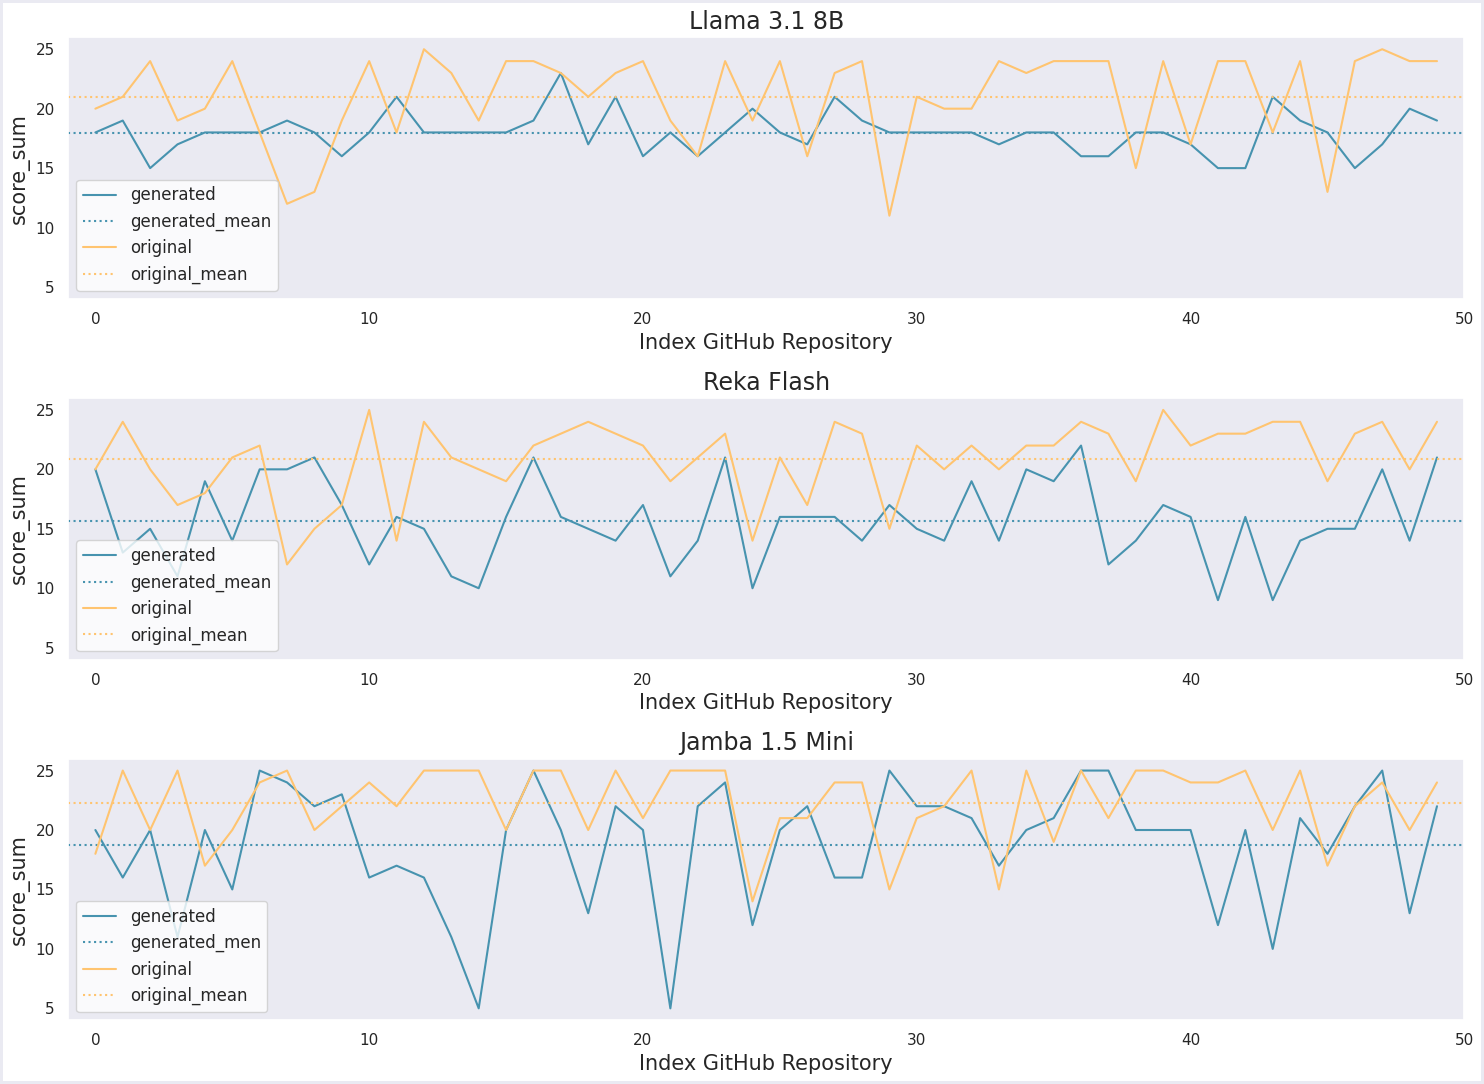

In [59]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(15, 11)) # create a figure and define size of plot
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    # llama
    l_score_g = df_eval_llama['total_score_g']
    l_score_g_mean = df_eval_llama['total_score_g'].mean()
    l_score_o = df_eval_llama['total_score_o']
    l_score_o_mean = df_eval_llama['total_score_o'].mean()

    # reka
    r_score_g = df_eval_reka['total_score_g']
    r_score_g_mean = df_eval_reka['total_score_g'].mean()
    r_score_o = df_eval_reka['total_score_o']
    r_score_o_mean = df_eval_reka['total_score_o'].mean()

    # jamba
    j_score_g = df_eval_jamba['total_score_g']
    j_score_g_mean = df_eval_jamba['total_score_g'].mean()
    j_score_o = df_eval_jamba['total_score_o']
    j_score_o_mean = df_eval_jamba['total_score_o'].mean()

    ax[0].plot(l_score_g, label='generated', color='#4793AF')
    ax[0].axhline(l_score_g_mean, label='generated_mean', color='#4793AF', linestyle=':')
    ax[0].plot(l_score_o, label='original', color='#FFC470')
    ax[0].axhline(l_score_o_mean, label='original_mean', color='#FFC470', linestyle=':')
    ax[0].set_title('Llama 3.1 8B', fontsize=17)
    ax[0].legend(loc=3, fontsize=12, facecolor='white')
    ax[0].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[0].set_xlim(-1,50)
    ax[0].set_ylabel('score_sum', fontsize =15)
    ax[0].set_ylim(4,26)

    ax[1].plot(r_score_g, label='generated', color='#4793AF')
    ax[1].axhline(r_score_g_mean, label='generated_mean', color='#4793AF', linestyle=':')
    ax[1].plot(r_score_o, label='original', color='#FFC470')
    ax[1].axhline(r_score_o_mean, label='original_mean', color='#FFC470', linestyle=':')
    ax[1].set_title('Reka Flash', fontsize=17)
    ax[1].legend(loc=3, fontsize=12, facecolor='white')
    ax[1].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[1].set_xlim(-1,50)
    ax[1].set_ylabel('score_sum', fontsize=15)
    ax[1].set_ylim(4,26)

    ax[2].plot(j_score_g, label='generated', color='#4793AF')
    ax[2].axhline(j_score_g_mean, label='generated_men', color='#4793AF', linestyle=':')
    ax[2].plot(j_score_o, label='original', color='#FFC470')
    ax[2].axhline(j_score_o_mean, label='original_mean', color='#FFC470', linestyle=':')
    ax[2].set_title('Jamba 1.5 Mini', fontsize=17)
    ax[2].legend(loc=3, fontsize=12, facecolor='white')
    ax[2].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[2].set_xlim(-1,50)
    ax[2].set_ylabel('score_sum', fontsize=15)
    ax[2].set_ylim(4,26)

    plt.grid(visible=False) # turn of grid
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

<u>Llama3.1-8b</u>  
Idx: 21  --> **MetaCubeX_mihomo**  
The generated README provides no information for the paragraphs *Installation*, *Usage* and  *Contributing*. The llm mentions that the description is not considered sufficient.

<u>Jamba 1.5-mini</u>  
Idx: 14 --> **mcdallas_wallstreet**  
The README dosen't provide any informations for the paragraphs *Installation*, *Usage* and *Contributing*.

In [ ]:
# fig.savefig("../pngs_ma/total_score_50_repos_all_llm.pdf")

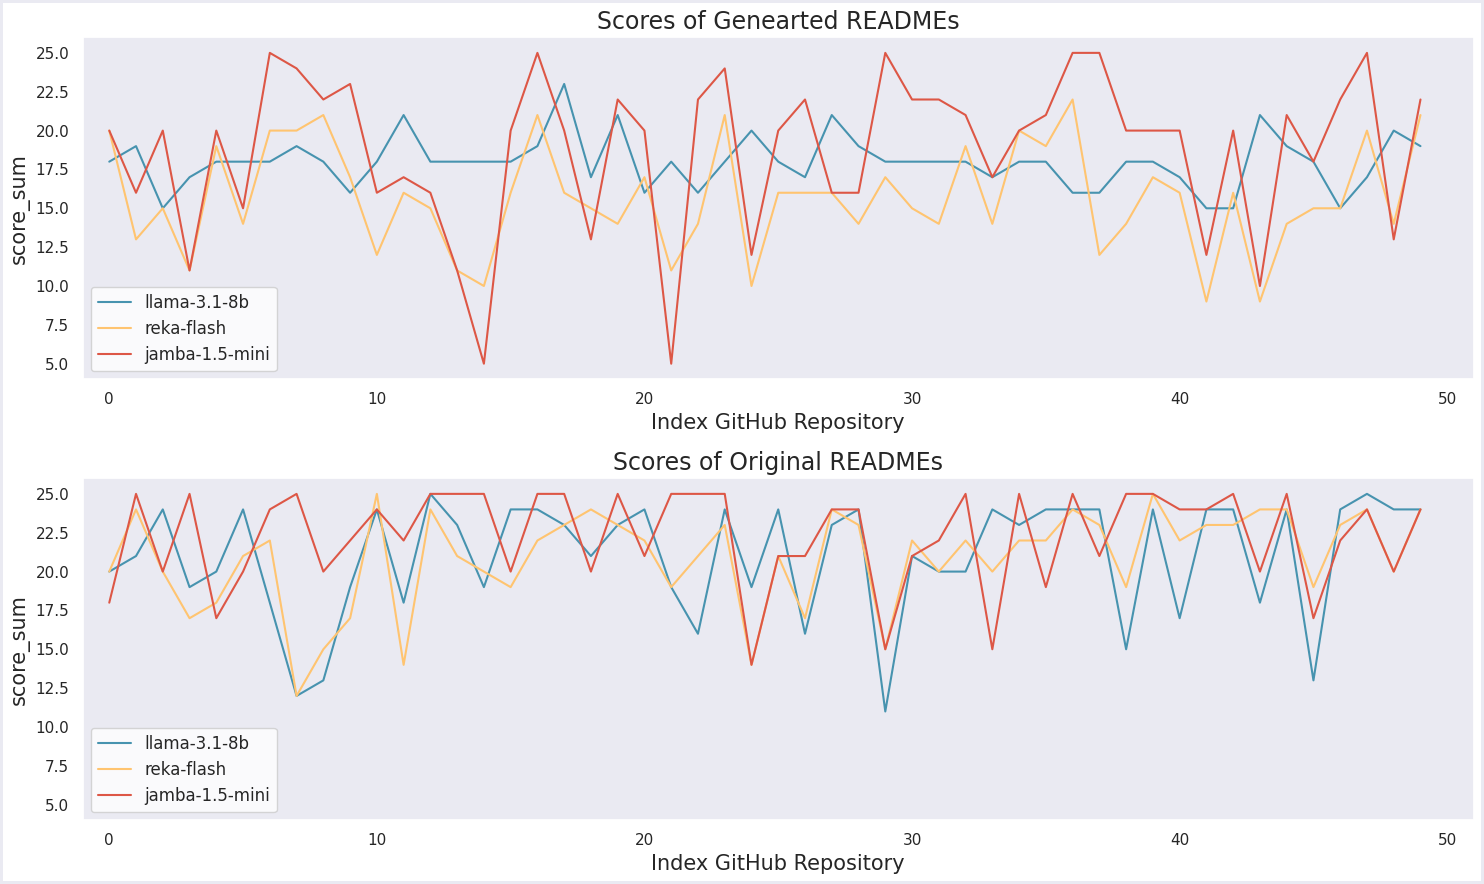

In [61]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15, 9)) # create a figure and define size of plot
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    # llama
    l_score_g = df_eval_llama['total_score_g']
    l_score_o = df_eval_llama['total_score_o']

    # reka
    r_score_g = df_eval_reka['total_score_g']
    r_score_o = df_eval_reka['total_score_o']

    # jamba
    j_score_g = df_eval_jamba['total_score_g']
    j_score_o = df_eval_jamba['total_score_o']

    ax[0].plot(l_score_g, label='llama-3.1-8b', color='#4793AF')
    ax[0].plot(r_score_g, label='reka-flash', color='#FFC470')
    ax[0].plot(j_score_g, label='jamba-1.5-mini', color='#DD5746')
    
    ax[0].set_title("Scores of Genearted READMEs", fontsize=17)
    ax[0].legend(loc=3, fontsize=12, facecolor='white')
    ax[0].set_ylabel('score_sum', fontsize=15)
    ax[0].set_xlim(-1,51)
    ax[0].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[0].set_ylim(4,26)

    ax[1].plot(l_score_o, label='llama-3.1-8b', color='#4793AF')
    ax[1].plot(r_score_o, label='reka-flash', color='#FFC470')
    ax[1].plot(j_score_o, label='jamba-1.5-mini', color='#DD5746')
    
    ax[1].set_title("Scores of Original READMEs", fontsize=17)
    ax[1].legend(loc=3, fontsize=12, facecolor='white')
    ax[1].set_ylabel('score_sum', fontsize=15)
    ax[1].set_xlim(-1,51)
    ax[1].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[1].set_ylim(4,26)

    plt.grid(visible=False) # turn of grid
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

The evaluation results for the generated README files which were created by the llm *jamba-1.5-mini* have higher values then the scores which assigned by the other two llms.

In [ ]:
# fig.savefig("../pngs_ma/total_score_50_repos_all_llm_compare_g_o.pdf")

## Dataframe df_jamba_com  
This dataframe contains the compressed results from df_jamba restricted on the total scores.

In [63]:
df_jamba_tmp = df_jamba[['id','repo_owner', 'repo_name', 'total_score_g', 'total_score_o', 'model_type']] # 'score_g', 'score_o', 'subsummary', 'subsummary_cnt']]

In [64]:
df_jamba_tmp

,id,repo_owner,repo_name,total_score_g,total_score_o,model_type
0,openstack_openstack,openstack,openstack,18,20,llama3.1-8b
1,majumderb_rezero,majumderb,rezero,19,21,llama3.1-8b
2,andkret_Cookbook,andkret,Cookbook,15,24,llama3.1-8b
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,17,19,llama3.1-8b
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,18,20,llama3.1-8b
...,...,...,...,...,...,...
145,postmanlabs_httpbin,postmanlabs,httpbin,18,17,jamba-1.5-mini
146,huggingface_alignment-handbook,huggingface,alignment-handbook,22,22,jamba-1.5-mini
147,YaoFANGUK_video-subtitle-extractor,YaoFANGUK,video-subtitle-extractor,25,24,jamba-1.5-mini
148,maralla_completor.vim,maralla,completor.vim,13,20,jamba-1.5-mini


In [65]:
df_jamba_tmp[df_jamba_tmp['repo_owner'] == 'openstack']

,id,repo_owner,repo_name,total_score_g,total_score_o,model_type
0,openstack_openstack,openstack,openstack,18,20,llama3.1-8b
50,openstack_openstack,openstack,openstack,20,20,reka-flash
100,openstack_openstack,openstack,openstack,20,18,jamba-1.5-mini


Calculate mean of score values.

In [66]:
# rows are grouped by 'id'
# .reset_index() --> prepare index of current df for merging into another df
# .rename() --> customise name of column which holds the results of the aggregation
df_tmp_g = df_jamba_tmp.groupby('id')['total_score_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'total_score_g': 'score_g'})
df_tmp_o = df_jamba_tmp.groupby('id')['total_score_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'total_score_o': 'score_o'})

# merge df_tmp_o & df_tmp_g by key 'id' to df_llama_tmp
df_jamba_tmp = df_jamba_tmp.merge(df_tmp_g, on='id', how='left') \
                           .merge(df_tmp_o, on='id', how='left')

Remove duplicate rows  
Each GitHub repository occurs three times because it was evaluated by three different models. Now only the mean of the three total_score values are required, so duplicates can be deleted.

In [67]:
df_jamba_tmp = df_jamba_tmp[~df_jamba_tmp['model_type'].isin(['reka-flash', 'jamba-1.5-mini'])]

In [68]:
df_jamba_com = df_jamba_tmp[['id','repo_owner', 'repo_name', 'score_g', 'score_o']]

In [69]:
df_jamba_com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          50 non-null     object 
 1   repo_owner  50 non-null     object 
 2   repo_name   50 non-null     object 
 3   score_g     50 non-null     float64
 4   score_o     50 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.3+ KB


In [70]:
df_jamba_com.describe()

,score_g,score_o
count,50.000000,50.000000
mean,17.473333,21.400000
std,2.603059,2.660708
min,11.000000,13.666667
25%,16.083333,20.416667
50%,17.833333,21.666667
75%,19.333333,23.666667
max,21.666667,24.666667


### Visualize the mean (score of all three evaluation models) of all scores for the generated and the original README's

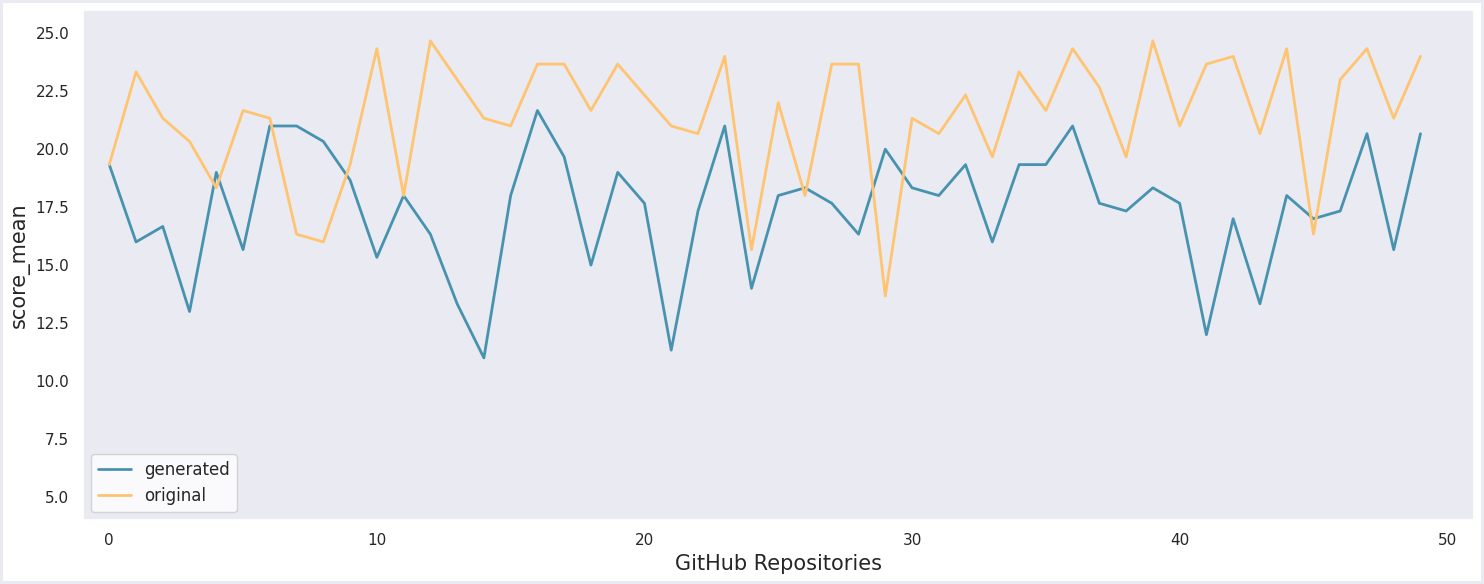

In [71]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # use sns style for axis
    sns.set_theme(style='dark') # set theme
    fig, ax = plt.subplots(figsize=(15, 6)) # define figure and primary axis
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    x_labels = df_jamba_com['id'] # ids of repositories
    x_numeric = np.arange(len(x_labels))  # numeric range with same length as x_labels (for trend numeric values are required)
    y_score_g = df_jamba_com['score_g'] # number of summaries for each repository
    y_score_o = df_jamba_com['score_o'] # total score of the genearted README's

    ax.plot(x_numeric, y_score_g, label='generated', color='#4793AF', linewidth=2)
    ax.plot(x_numeric, y_score_o, label='original', color='#FFC470', linewidth=2)
    ax.set_xlabel('Index GitHub Repository', fontsize=15)
    ax.set_ylabel('score_mean', fontsize=15)
    ax.tick_params(axis='y')

    ax.set_xlabel('GitHub Repositories') # set label for x-axis
    ax.set_xlim(-1,51)
    ax.set_ylim(4,26)

    plt.legend(facecolor='white', fontsize=12)
    #plt.title("Comparison of README Scores: Generated vs. Original",fontsize=14, pad=15) # set title
    fig.tight_layout()
    plt.show() # show plot

sns.reset_defaults() # reset sns changes

In [ ]:
# fig.savefig("../pngs_ma/total_score_50_repos_g_o.pdf")

### *Additional dataframe with the total score and the score by each single question*

In [73]:
df_jamba_tmp2 = df_jamba.copy()

In [74]:
df_tmp2_g_1 = df_jamba_tmp2.groupby('id')['score_q1_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q1_g': 'score_q1_g_1'})
df_tmp2_g_2 = df_jamba_tmp2.groupby('id')['score_q2_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q2_g': 'score_q2_g_2'})
df_tmp2_g_3 = df_jamba_tmp2.groupby('id')['score_q3_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q3_g': 'score_q3_g_3'})
df_tmp2_g_4 = df_jamba_tmp2.groupby('id')['score_q4_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q4_g': 'score_q4_g_4'})
df_tmp2_g_5 = df_jamba_tmp2.groupby('id')['score_q5_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q5_g': 'score_q5_g_5'})

df_tmp2_o_1 = df_jamba_tmp2.groupby('id')['score_q1_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q1_o': 'score_q1_o_1'})
df_tmp2_o_2 = df_jamba_tmp2.groupby('id')['score_q2_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q2_o': 'score_q2_o_2'})
df_tmp2_o_3 = df_jamba_tmp2.groupby('id')['score_q3_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q3_o': 'score_q3_o_3'})
df_tmp2_o_4 = df_jamba_tmp2.groupby('id')['score_q4_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q4_o': 'score_q4_o_4'})
df_tmp2_o_5 = df_jamba_tmp2.groupby('id')['score_q5_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q5_o': 'score_q5_o_5'})

df_jamba_tmp2 = df_jamba_tmp2.merge(df_tmp2_g_1, on='id', how='left') \
                           .merge(df_tmp2_g_2, on='id', how='left') \
                           .merge(df_tmp2_g_3, on='id', how='left') \
                           .merge(df_tmp2_g_4, on='id', how='left') \
                           .merge(df_tmp2_g_5, on='id', how='left') \
                           .merge(df_tmp2_o_1, on='id', how='left') \
                           .merge(df_tmp2_o_2, on='id', how='left') \
                           .merge(df_tmp2_o_3, on='id', how='left') \
                           .merge(df_tmp2_o_4, on='id', how='left') \
                           .merge(df_tmp2_o_5, on='id', how='left') 

In [75]:
df_jamba_tmp2 = df_jamba_tmp2.drop(['score_q1_g', 'score_q2_g','score_q3_g','score_q4_g', 'score_q5_g','score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o', 'total_score_g', 'total_score_o'], axis=1)

In [76]:
df_jamba_tmp2 = df_jamba_tmp2[~df_jamba_tmp2['model_type'].isin(['reka-flash', 'jamba-1.5-mini'])]

In [77]:
df_jamba_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            50 non-null     object 
 1   repo_owner    50 non-null     object 
 2   repo_name     50 non-null     object 
 3   model_type    50 non-null     object 
 4   score_q1_g_1  50 non-null     float64
 5   score_q2_g_2  50 non-null     float64
 6   score_q3_g_3  50 non-null     float64
 7   score_q4_g_4  50 non-null     float64
 8   score_q5_g_5  50 non-null     float64
 9   score_q1_o_1  50 non-null     float64
 10  score_q2_o_2  50 non-null     float64
 11  score_q3_o_3  50 non-null     float64
 12  score_q4_o_4  50 non-null     float64
 13  score_q5_o_5  50 non-null     float64
dtypes: float64(10), object(4)
memory usage: 5.9+ KB


Visualize the compressed score for each question. The repositories are sorted by the execution order of the README generation (from small to big).

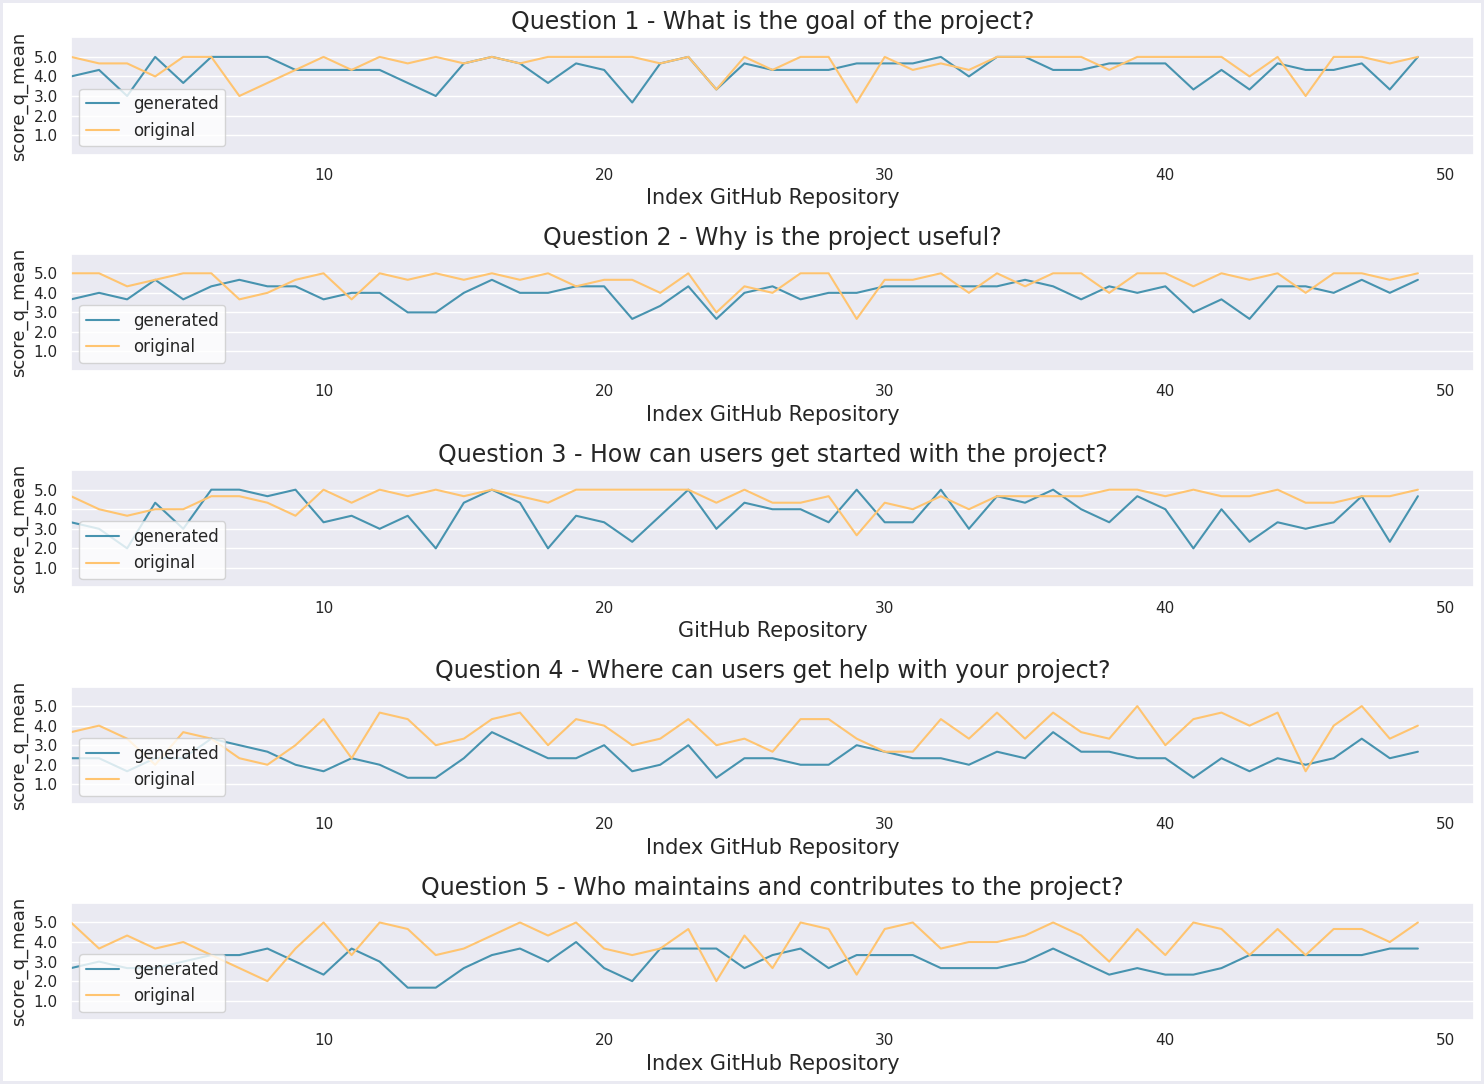

In [78]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(15, 11)) # create a figure and define size of plot
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    # generated
    q1_g = df_jamba_tmp2['score_q1_g_1']
    q2_g = df_jamba_tmp2['score_q2_g_2']
    q3_g = df_jamba_tmp2['score_q3_g_3']
    q4_g = df_jamba_tmp2['score_q4_g_4']
    q5_g = df_jamba_tmp2['score_q5_g_5']
    # origignal
    q1_o = df_jamba_tmp2['score_q1_o_1']
    q2_o = df_jamba_tmp2['score_q2_o_2']
    q3_o = df_jamba_tmp2['score_q3_o_3']
    q4_o = df_jamba_tmp2['score_q4_o_4']
    q5_o = df_jamba_tmp2['score_q5_o_5']

    ax[0].plot(q1_g, label='generated', color='#4793AF')
    ax[0].plot(q1_o, label='original', color='#FFC470')
    ax[0].set_title('Question 1 - What is the goal of the project?', fontsize=17)
    ax[0].legend(loc=3, fontsize=12, facecolor='white')
    ax[0].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[0].set_xlim(1,51)
    ax[0].set_ylabel('score_q_mean', fontsize=13)
    ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[0].set_yticks([1, 2, 3, 4, 5])
    ax[0].set_ylim(0,6)
    ax[0].grid(visible=True, axis='y') 

    ax[1].plot(q2_g, label='generated', color='#4793AF')
    ax[1].plot(q2_o, label='original', color='#FFC470')
    ax[1].set_title('Question 2 - Why is the project useful?', fontsize=17)
    ax[1].legend(loc=3, fontsize=12, facecolor='white')
    ax[1].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[1].set_xlim(1,51)
    ax[1].set_ylabel('score_q_mean', fontsize=13)
    ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[1].set_yticks([1, 2, 3, 4, 5])
    ax[1].set_ylim(0,6)
    ax[1].grid(visible=True, axis='y')

    ax[2].plot(q3_g, label='generated', color='#4793AF')
    ax[2].plot(q3_o, label='original', color='#FFC470')
    ax[2].set_title('Question 3 - How can users get started with the project?', fontsize=17)
    ax[2].legend(loc=3, fontsize=12, facecolor='white')
    ax[2].set_xlabel('GitHub Repository', fontsize=15)
    ax[2].set_xlim(1,51)
    ax[2].set_ylabel('score_q_mean', fontsize=13)
    ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[2].set_yticks([1, 2, 3, 4, 5])
    ax[2].set_ylim(0,6)
    ax[2].grid(visible=True, axis='y') 

    ax[3].plot(q4_g, label='generated', color='#4793AF')
    ax[3].plot(q4_o, label='original', color='#FFC470')
    ax[3].set_title('Question 4 - Where can users get help with your project?', fontsize=17)
    ax[3].legend(loc=3, fontsize=12, facecolor='white')
    ax[3].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[3].set_xlim(1,51)
    ax[3].set_ylabel('score_q_mean', fontsize=13)
    ax[3].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[3].set_yticks([1, 2, 3, 4, 5])
    ax[3].set_ylim(0,6)
    ax[3].grid(visible=True, axis='y') 

    ax[4].plot(q5_g, label='generated', color='#4793AF')
    ax[4].plot(q5_o, label='original', color='#FFC470')
    ax[4].set_title('Question 5 - Who maintains and contributes to the project?', fontsize=17)
    ax[4].legend(loc=3, fontsize=12, facecolor='white')
    ax[4].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[4].set_xlim(1,51)
    ax[4].set_ylabel('score_q_mean', fontsize=13)
    ax[4].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[4].set_yticks([1, 2, 3, 4, 5])
    ax[4].set_ylim(0,6)
    ax[4].grid(visible=True, axis='y') 

    # plt.grid(visible=True)
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

In [ ]:
# fig.savefig("../pngs_ma/score_question_50_repos_g_o.pdf")

In [80]:
df_jamba_tmp2.describe()

,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.346667,4.000000,3.746667,2.360000,3.020000,4.620000,4.580000,4.526667,3.640000,4.033333
std,0.609673,0.538748,0.934499,0.554675,0.544650,0.594800,0.546313,0.508834,0.837987,0.830949
min,2.666667,2.666667,2.000000,1.333333,1.666667,2.666667,2.666667,2.666667,1.666667,2.000000
25%,4.333333,3.666667,3.083333,2.000000,2.666667,4.333333,4.333333,4.333333,3.000000,3.416667
50%,4.333333,4.000000,3.666667,2.333333,3.000000,5.000000,4.666667,4.666667,3.666667,4.166667
75%,4.666667,4.333333,4.666667,2.666667,3.333333,5.000000,5.000000,5.000000,4.333333,4.666667
max,5.000000,4.666667,5.000000,3.666667,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# df_jamba_tmp2.to_json('../data/evaluation_results/df_jamba_questions.json', orient='records')

## df_jamba vs. df_llama (only 1-50 GitHub repositories)  
In the next paragraph the scores of the first 50 GitHub repositories which were generated by *llama3.1-8b* and *jamba-1.5-mini* should be compared with each other.

### Compare df_jamba vs df_llama by total scores

In [82]:
df_g_t_llama = load_data(path='../data/evaluation_results/df_llama_com.json')
df_g_t_llama = df_g_t_llama[['id', 'repo_owner', 'repo_name', 'score_g']]
df_g_t_llama = df_g_t_llama.loc[0:49]

In [83]:
df_g_t_llama.head(3)

,id,repo_owner,repo_name,score_g
0,openstack_openstack,openstack,openstack,20.000000
1,majumderb_rezero,majumderb,rezero,22.333333
2,andkret_Cookbook,andkret,Cookbook,20.000000


In [84]:
df_g_t_llama['score_g'].mean()

19.599999999994

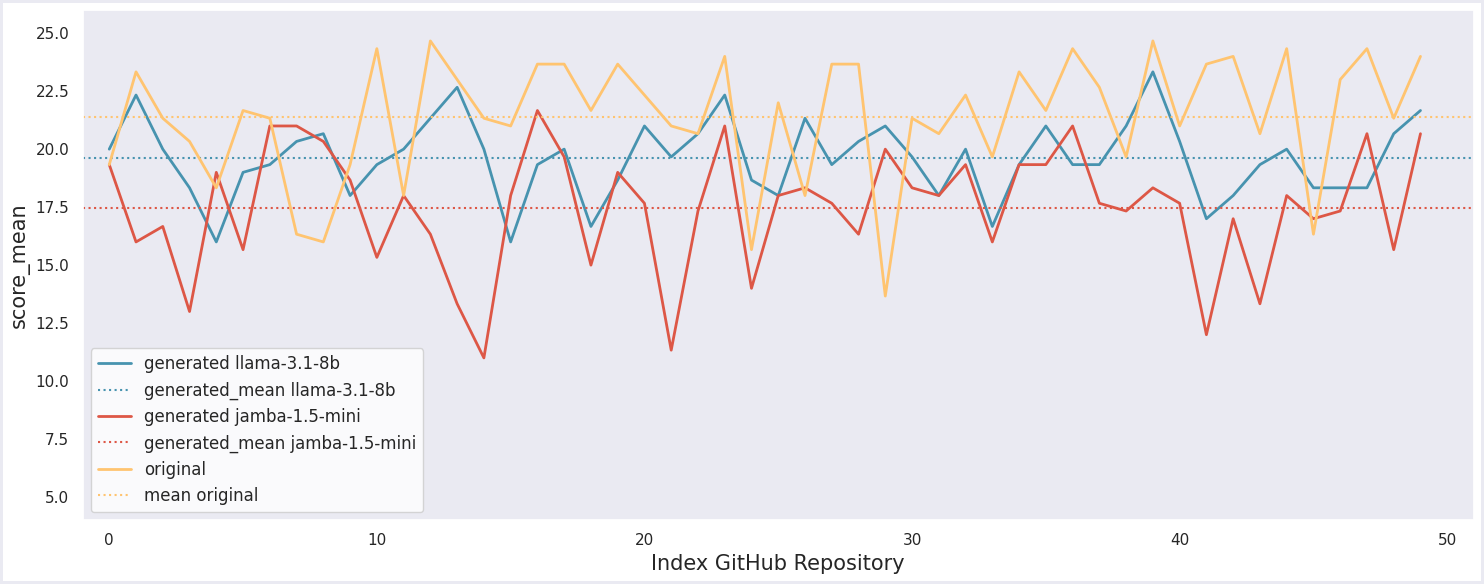

In [85]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # use sns style for axis
    sns.set_theme(style='dark') # set theme
    fig, ax = plt.subplots(figsize=(15, 6))
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    x_labels = df_jamba_com['id'] # ids of repositories
    x_numeric = np.arange(len(x_labels))  # numeric range with same length as x_labels (for trend numeric values are required)
    
    # # jamba
    y_score_g_j = df_jamba_com['score_g']
    mean_score_g_j = df_jamba_com['score_g'].mean()
    # llama
    y_score_g_l = df_g_t_llama['score_g']
    mean_score_g_l = df_g_t_llama['score_g'].mean()
    # original
    y_score_o = df_jamba_com['score_o']
    mean_score_o = df_jamba_com['score_o'].mean()
    
    ax.plot(x_numeric, y_score_g_l, label='generated llama-3.1-8b', color='#4793AF', linewidth=2)
    ax.axhline(mean_score_g_l, label='generated_mean llama-3.1-8b', color='#4793AF', linestyle=':')

    ax.plot(x_numeric, y_score_g_j, label='generated jamba-1.5-mini', color='#DD5746', linewidth=2)
    ax.axhline(mean_score_g_j, label='generated_mean jamba-1.5-mini', color='#DD5746', linestyle=':')

    ax.plot(x_numeric, y_score_o, label='original', color='#FFC470', linewidth=2)
    ax.axhline(mean_score_o, label='mean original', color='#FFC470', linestyle=':')

    ax.set_xlabel('Index GitHub Repository', fontsize=15)
    ax.set_ylabel('score_mean', fontsize=15)
    ax.tick_params(axis='y')
    ax.set_xlim(-1,51)
    ax.set_ylim(4,26)

    plt.legend(fontsize=12, facecolor='white')
    #plt.title("Comparison of README Scores: Generated by Jamba-1.5-mini vs Generated by Llama3.1-8b vs Original",fontsize=14, pad=15) # set title
    fig.tight_layout()
    plt.show() # show plot

sns.reset_defaults() # reset sns changes

In [ ]:
# fig.savefig("../pngs_ma/total_score_50_repos_g_o_llama_vs_jamba.pdf")

In [87]:
print(f'generated_mean llama3.1-8b: {mean_score_g_l}')
print(f'generated_mean jamba-1.5-mini: {mean_score_g_j}')
print(f'original_mean: {mean_score_o}')

generated_mean llama3.1-8b: 19.599999999994
generated_mean jamba-1.5-mini: 17.47333333333333
original_mean: 21.399999999999995


### Compare df_jamba vs df_llama by scores of each question

In [88]:
df_g_q_llama = load_data(path='../data/evaluation_results/df_llama_questions.json')
df_g_q_llama = df_g_q_llama[['id', 'repo_owner', 'repo_name', 'score_q1_g_1', 'score_q2_g_2', 'score_q3_g_3', 'score_q4_g_4', 'score_q5_g_5']]
df_g_q_llama = df_g_q_llama.loc[0:49]

In [89]:
len(df_g_q_llama)

50

In [90]:
df_g_q_llama.head(3)

,id,repo_owner,repo_name,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5
0,openstack_openstack,openstack,openstack,4.666667,4.000000,5.000000,3.000000,3.333333
1,majumderb_rezero,majumderb,rezero,5.000000,4.333333,5.000000,3.333333,4.666667
2,andkret_Cookbook,andkret,Cookbook,5.000000,4.333333,4.666667,2.666667,3.333333


In [91]:
df_jamba_tmp2.head(3)

,id,repo_owner,repo_name,model_type,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
0,openstack_openstack,openstack,openstack,llama3.1-8b,5.000000,4.333333,4.666667,2.666667,2.666667,4.000000,4.0,3.000000,4.333333,4.000000
1,majumderb_rezero,majumderb,rezero,llama3.1-8b,4.000000,3.666667,3.333333,2.333333,2.666667,5.000000,5.0,4.666667,3.666667,5.000000
2,andkret_Cookbook,andkret,Cookbook,llama3.1-8b,4.333333,4.000000,3.000000,2.333333,3.000000,4.666667,5.0,4.000000,4.000000,3.666667


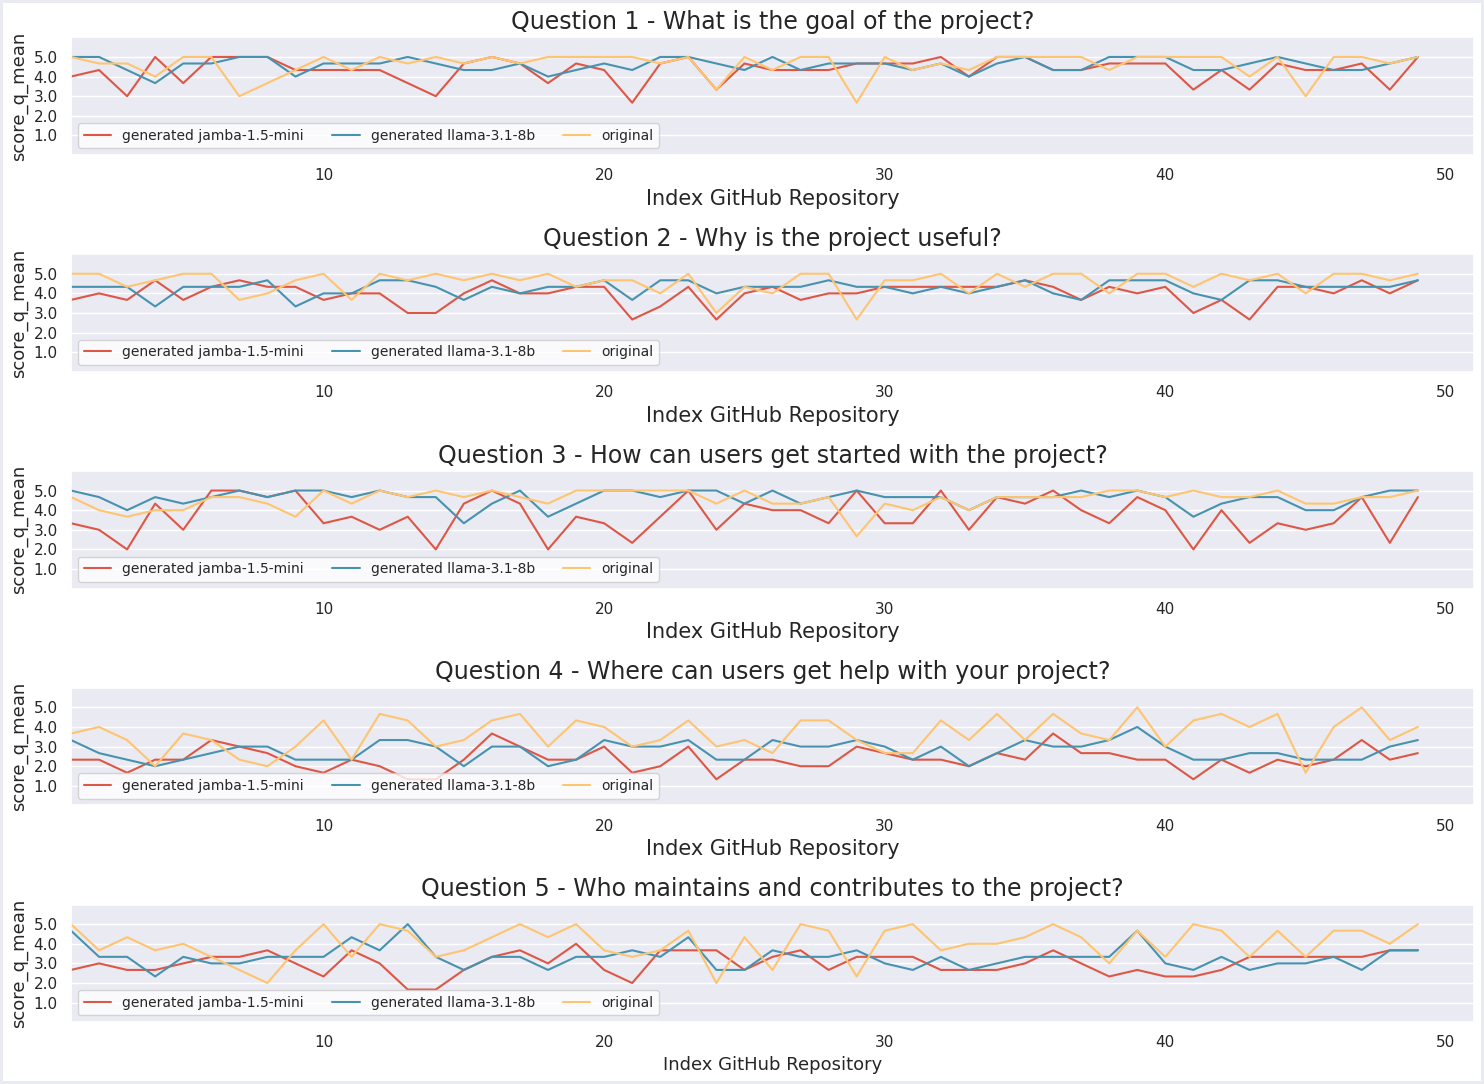

In [92]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(15, 11)) # create a figure and define size of plot
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    # generated - jamba
    q1_g_j = df_jamba_tmp2['score_q1_g_1']
    q2_g_j = df_jamba_tmp2['score_q2_g_2']
    q3_g_j = df_jamba_tmp2['score_q3_g_3']
    q4_g_j = df_jamba_tmp2['score_q4_g_4']
    q5_g_j = df_jamba_tmp2['score_q5_g_5']

    # generated - llama
    q1_g_l = df_g_q_llama['score_q1_g_1']
    q2_g_l = df_g_q_llama['score_q2_g_2']
    q3_g_l = df_g_q_llama['score_q3_g_3']
    q4_g_l = df_g_q_llama['score_q4_g_4']
    q5_g_l = df_g_q_llama['score_q5_g_5'] 

    # origignal
    q1_o = df_jamba_tmp2['score_q1_o_1']
    q2_o = df_jamba_tmp2['score_q2_o_2']
    q3_o = df_jamba_tmp2['score_q3_o_3']
    q4_o = df_jamba_tmp2['score_q4_o_4']
    q5_o = df_jamba_tmp2['score_q5_o_5']

    ax[0].plot(q1_g_j, label='generated jamba-1.5-mini', color='#DD5746')
    ax[0].plot(q1_g_l, label='generated llama-3.1-8b', color='#4793AF')
    ax[0].plot(q1_o, label='original', color='#FFC470')
    ax[0].set_title('Question 1 - What is the goal of the project?', fontsize=17)
    ax[0].legend(ncols=3, loc=3, fontsize=10, facecolor='white')
    ax[0].set_xlim(1,51)
    ax[0].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[0].set_yticks([1, 2, 3, 4, 5])
    ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[0].set_ylim(0,6)
    ax[0].set_ylabel('score_q_mean', fontsize=13)
    ax[0].grid(visible=True, axis='y')

    ax[1].plot(q2_g_j, label='generated jamba-1.5-mini', color='#DD5746')
    ax[1].plot(q2_g_l, label='generated llama-3.1-8b', color='#4793AF')
    ax[1].plot(q2_o, label='original', color='#FFC470')
    ax[1].set_title('Question 2 - Why is the project useful?', fontsize=17)
    ax[1].legend(ncols=3, loc=3, fontsize=10, facecolor='white')
    ax[1].set_xlim(1,51)
    ax[1].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[1].set_yticks([1, 2, 3, 4, 5])
    ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[1].set_ylim(0,6)
    ax[1].set_ylabel('score_q_mean', fontsize=13)
    ax[1].grid(visible=True, axis='y')

    ax[2].plot(q3_g_j, label='generated jamba-1.5-mini', color='#DD5746')
    ax[2].plot(q3_g_l, label='generated llama-3.1-8b', color='#4793AF')
    ax[2].plot(q3_o, label='original', color='#FFC470')
    ax[2].set_title('Question 3 - How can users get started with the project?', fontsize=17)
    ax[2].legend(ncols=3, loc=3, fontsize=10, facecolor='white')
    ax[2].set_xlim(1,51)
    ax[2].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[2].set_yticks([1, 2, 3, 4, 5])
    ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[2].set_ylim(0,6)
    ax[2].set_ylabel('score_q_mean', fontsize=13)
    ax[2].grid(visible=True, axis='y')

    ax[3].plot(q4_g_j, label='generated jamba-1.5-mini', color='#DD5746')
    ax[3].plot(q4_g_l, label='generated llama-3.1-8b', color='#4793AF')
    ax[3].plot(q4_o, label='original', color='#FFC470')
    ax[3].set_title('Question 4 - Where can users get help with your project?', fontsize=17)
    ax[3].legend(ncols=3, loc=3, fontsize=10, facecolor='white')
    ax[3].set_xlim(1,51)
    ax[3].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[3].set_yticks([1, 2, 3, 4, 5])
    ax[3].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[3].set_ylim(0,6)
    ax[3].set_ylabel('score_q_mean', fontsize=13)
    ax[3].grid(visible=True, axis='y')

    ax[4].plot(q5_g_j, label='generated jamba-1.5-mini', color='#DD5746')
    ax[4].plot(q5_g_l, label='generated llama-3.1-8b', color='#4793AF')
    ax[4].plot(q5_o, label='original', color='#FFC470')
    ax[4].set_title('Question 5 - Who maintains and contributes to the project?', fontsize=17)
    ax[4].legend(ncols=3, loc=3, fontsize=10, facecolor='white')
    ax[4].set_xlim(1,51)
    ax[4].set_xlabel('Index GitHub Repository', fontsize=13)
    ax[4].set_yticks([1, 2, 3, 4, 5])
    ax[4].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[4].set_ylim(0,6)
    ax[4].set_ylabel('score_q_mean', fontsize=13)
    ax[4].grid(visible=True, axis='y') 

    #plt.grid(visible=False, axis='y')
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

In [ ]:
# fig.savefig("../pngs_ma/score_question_50_repos_g_o_llama_vs_jamba.pdf")

In [ ]:
# df_jamba_com.to_json('../data/evaluation_results/df_jamba_com.json', orient='records')

In [95]:
q1_g.info()

<class 'pandas.core.series.Series'>
Index: 50 entries, 0 to 49
Series name: score_q1_g_1
Non-Null Count  Dtype  
--------------  -----  
50 non-null     float64
dtypes: float64(1)
memory usage: 2.8 KB


## Addtional metrics for score_q_mean

In [96]:
# df for metrics

df_metric_question = pd.DataFrame(
    {  'q1_g_l': q1_g_l, 
       'q2_g_l': q2_g_l, 
       'q3_g_l': q3_g_l, 
       'q4_g_l': q4_g_l, 
       'q5_g_l': q5_g_l, 
       'q1_g_j': q1_g_j, 
       'q2_g_j': q2_g_j,
       'q3_g_j': q3_g_j, 
       'q4_g_j': q4_g_j, 
       'q5_g_j': q5_g_j,
       'q1_o': q1_o,
       'q2_o': q2_o,
       'q3_o': q3_o,
       'q4_o': q4_o,
       'q5_o': q5_o
    }
)


In [97]:
df_metric_question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   q1_g_l  50 non-null     float64
 1   q2_g_l  50 non-null     float64
 2   q3_g_l  50 non-null     float64
 3   q4_g_l  50 non-null     float64
 4   q5_g_l  50 non-null     float64
 5   q1_g_j  50 non-null     float64
 6   q2_g_j  50 non-null     float64
 7   q3_g_j  50 non-null     float64
 8   q4_g_j  50 non-null     float64
 9   q5_g_j  50 non-null     float64
 10  q1_o    50 non-null     float64
 11  q2_o    50 non-null     float64
 12  q3_o    50 non-null     float64
 13  q4_o    50 non-null     float64
 14  q5_o    50 non-null     float64
dtypes: float64(15)
memory usage: 6.0 KB


In [98]:
df_metric_question_copy = df_metric_question.copy()

In [99]:
df_metric_question_copy.describe()

,q1_g_l,q2_g_l,q3_g_l,q4_g_l,q5_g_l,q1_g_j,q2_g_j,q3_g_j,q4_g_j,q5_g_j,q1_o,q2_o,q3_o,q4_o,q5_o
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.606667,4.273333,4.620000,2.786667,3.313333,4.346667,4.000000,3.746667,2.360000,3.020000,4.620000,4.580000,4.526667,3.640000,4.033333
std,0.327777,0.354370,0.404117,0.465402,0.548798,0.609673,0.538748,0.934499,0.554675,0.544650,0.594800,0.546313,0.508834,0.837987,0.830949
min,3.666667,3.333333,3.333333,2.000000,2.333333,2.666667,2.666667,2.000000,1.333333,1.666667,2.666667,2.666667,2.666667,1.666667,2.000000
25%,4.333333,4.000000,4.416667,2.333333,3.000000,4.333333,3.666667,3.083333,2.000000,2.666667,4.333333,4.333333,4.333333,3.000000,3.416667
50%,4.666667,4.333333,4.666667,3.000000,3.333333,4.333333,4.000000,3.666667,2.333333,3.000000,5.000000,4.666667,4.666667,3.666667,4.166667
75%,5.000000,4.666667,5.000000,3.000000,3.333333,4.666667,4.333333,4.666667,2.666667,3.333333,5.000000,5.000000,5.000000,4.333333,4.666667
max,5.000000,4.666667,5.000000,4.000000,5.000000,5.000000,4.666667,5.000000,3.666667,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [100]:
df_metric_question_copy['q5_o'].describe()

count    50.000000
mean      4.033333
std       0.830949
min       2.000000
25%       3.416667
50%       4.166667
75%       4.666667
max       5.000000
Name: q5_o, dtype: float64